In [1]:
import os
import numpy as np
import mne

In [2]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_filt-0-40_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

100%|#####################################| 1.65G/1.65G [00:00<00:00, 1.73TB/s]
Untarring contents of 'C:\Users\Administrator\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\Administrator\mne_data'


Opening raw data file C:\Users\Administrator\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


Effective window size : 13.639 (s)
Effective window size : 13.639 (s)
Effective window size : 13.639 (s)


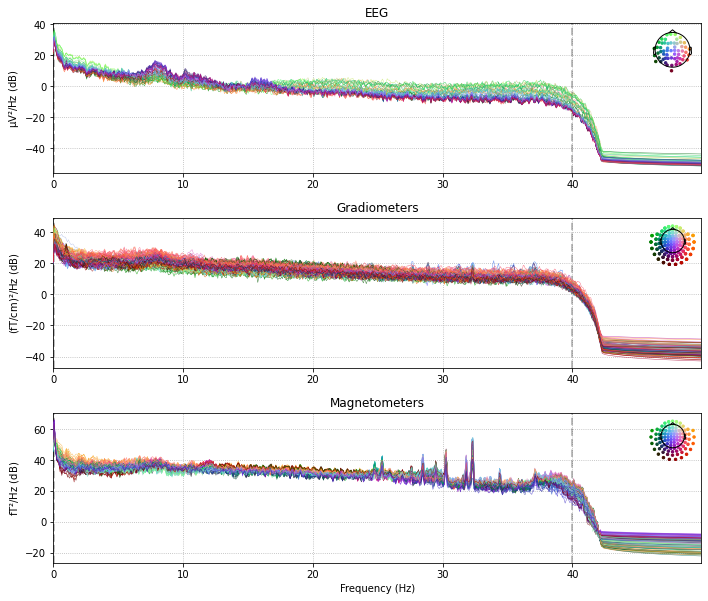

Using matplotlib as 2D backend.


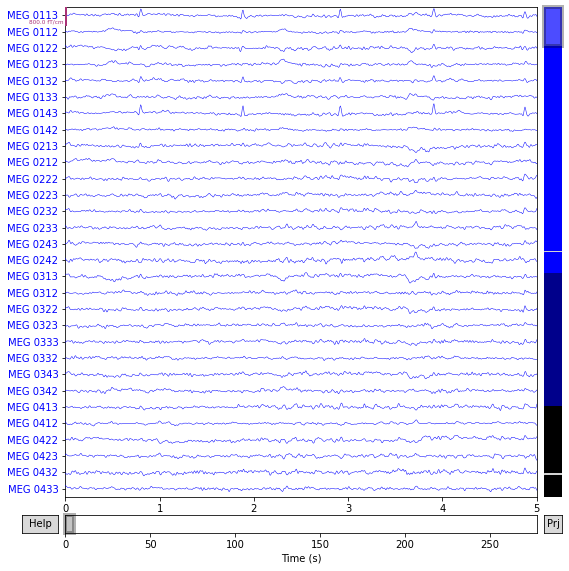

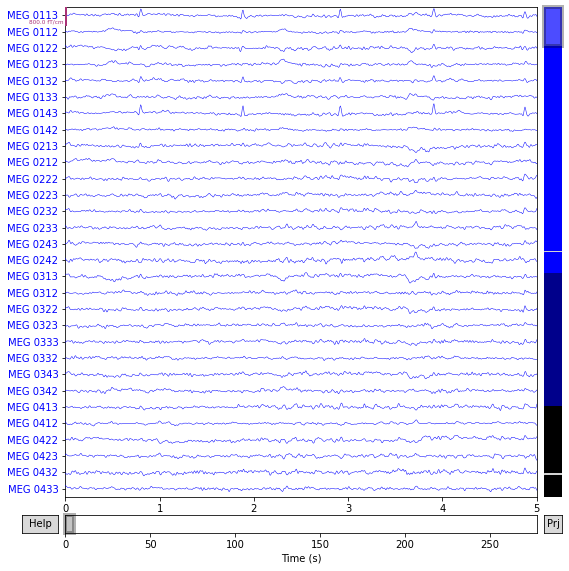

In [3]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 364 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 4.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


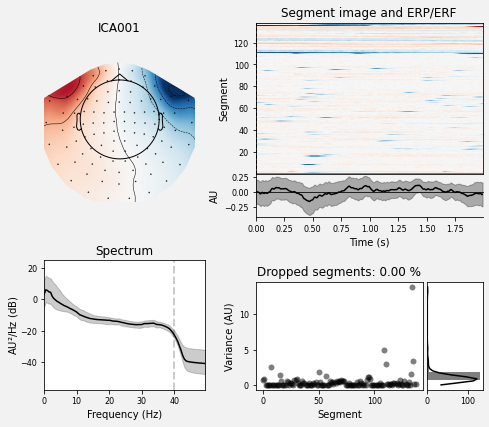

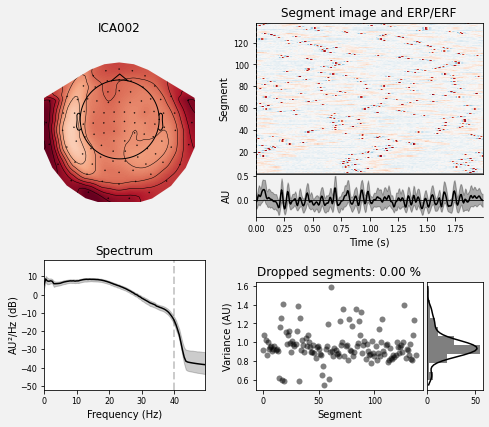

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [4]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


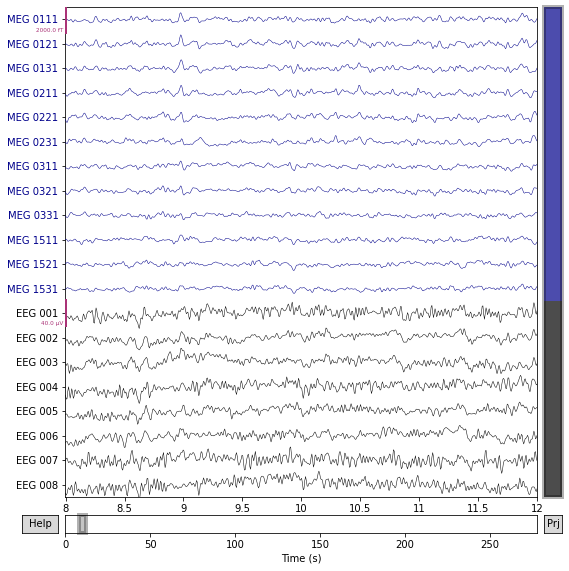

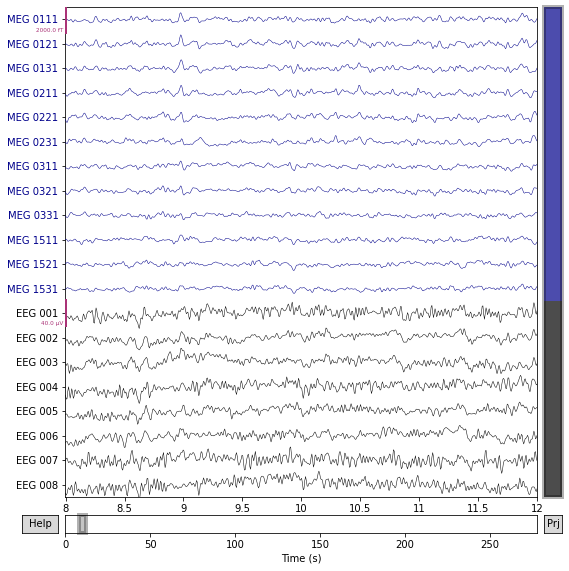

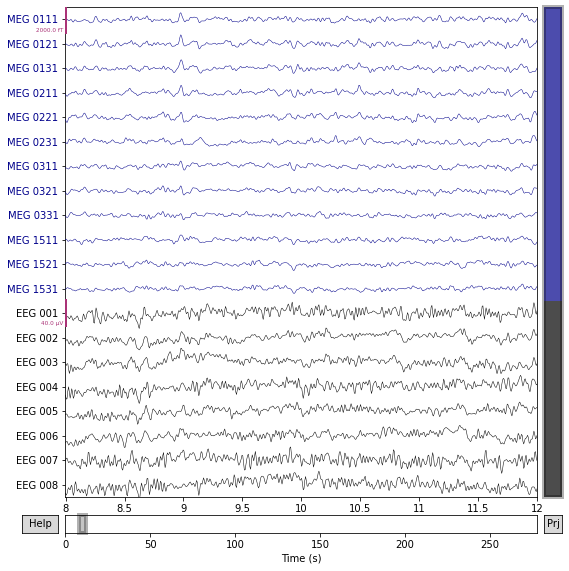

In [7]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)

# show some frontal channels to clearly illustrate the artifact removal
chs = ['MEG 0111', 'MEG 0121', 'MEG 0131', 'MEG 0211', 'MEG 0221', 'MEG 0231',
       'MEG 0311', 'MEG 0321', 'MEG 0331', 'MEG 1511', 'MEG 1521', 'MEG 1531',
       'EEG 001', 'EEG 002', 'EEG 003', 'EEG 004', 'EEG 005', 'EEG 006',
       'EEG 007', 'EEG 008']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=8, duration=4)
raw.plot(order=chan_idxs, start=8, duration=4)

Extracting EDF parameters from e:\19_BCIexperiment\02_CodeTest\MNE_TEST\B0101T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG:C3, EEG:Cz, EEG:C4, EOG:ch01, EOG:ch02, EOG:ch03
Creating raw.info structure...


D:\ANACONDA\envs\ML_py38_CU\lib\site-packages\mne\io\edf\edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17820\515632953.py:1: RuntimeWarning: Highpass cutoff frequency 100.0 is greater than lowpass cutoff frequency 0.5, setting values to 0 and Nyquist.
  my_raw = mne.io.read_raw_gdf('B0101T.gdf')


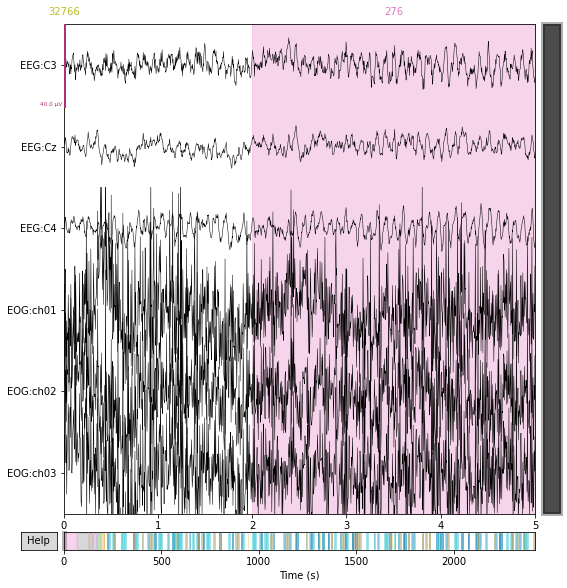

Reading 0 ... 604802  =      0.000 ...  2419.208 secs...


<RawGDF | B0101T.gdf, 6 x 604803 (2419.2 s), ~27.7 MB, data loaded>

In [124]:
my_raw = mne.io.read_raw_gdf('B0101T.gdf')
my_raw.plot(duration=5, n_channels=30)
my_raw.load_data()


In [125]:


tmin = -0.5
tmax = 3.5

#769 -- 佐    770 -- 右   771 -- 脚  772 -- 舌头
custom_mapping = {'769':3,'770':4}
(events_from_annot,event_dict) = mne.events_from_annotations(my_raw, event_id=custom_mapping)

#去除眼动EOG通道信号
my_raw.drop_channels([ 'EOG:ch01', 'EOG:ch02', 'EOG:ch03'])

epochs = mne.Epochs(my_raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=tmin,tmax=tmax)

my_raw.info['ch_names']


Used Annotations descriptions: ['769', '770']
Not setting metadata
Not setting metadata
120 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 1001 original time points ...
0 bad epochs dropped


['EEG:C3', 'EEG:Cz', 'EEG:C4']

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


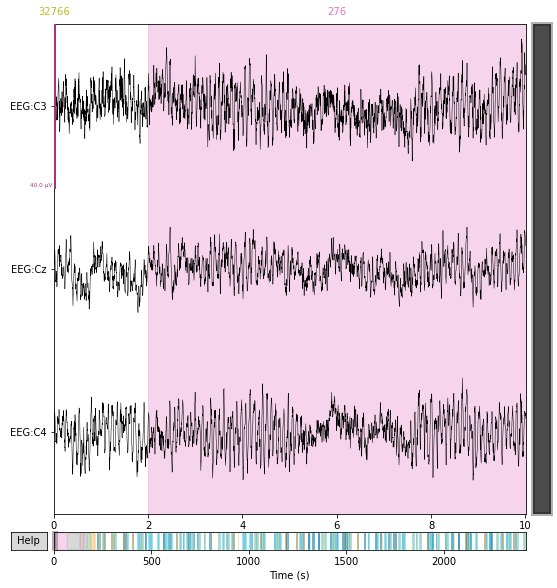

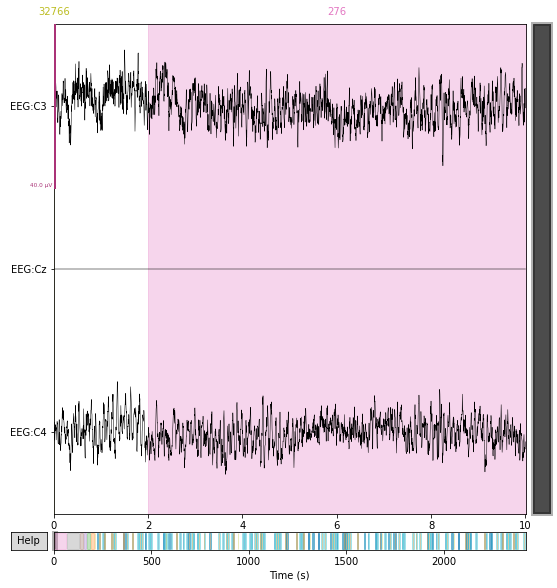

In [126]:
rereferenced_raw, ref_data = mne.set_eeg_reference(my_raw, ['EEG:Cz'],
                                                   copy=True)
fig_orig = my_raw.plot()
fig_reref = rereferenced_raw.plot()

In [127]:
custom_mapping = {'769':3,'770':4}
(events_from_annot,event_dict) = mne.events_from_annotations(rereferenced_raw, event_id=custom_mapping)


epochs = mne.Epochs(rereferenced_raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=tmin,tmax=tmax)

Used Annotations descriptions: ['769', '770']
Not setting metadata
Not setting metadata
120 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 120 events and 1001 original time points ...
0 bad epochs dropped


Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17820\690076584.py:5: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_epochs.plot_image(picks=my_raw.info['ch_names'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17820\690076584.py:5: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_epochs.plot_image(picks=my_raw.info['ch_names'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17820\690076584.py:5: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  left_epochs.plot_image(picks=my_raw.info['ch_names'])


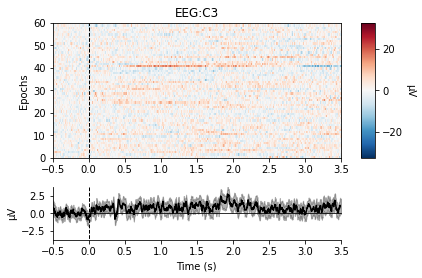

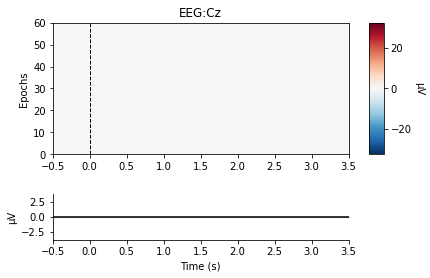

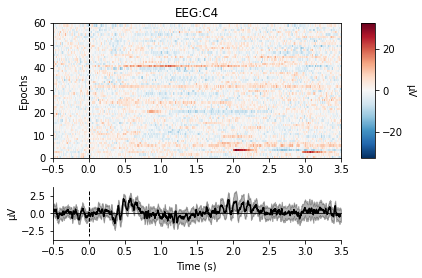

[<Figure size 432x288 with 3 Axes>,
 <Figure size 432x288 with 3 Axes>,
 <Figure size 432x288 with 3 Axes>]

In [128]:
#epochs.plot_image(picks=['EEG-C3', 'EEG-Cz','EEG-C4'])

left_epochs = epochs['769']
right_epochs = epochs['770']
left_epochs.plot_image(picks=my_raw.info['ch_names'])

Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17820\975024056.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  right_epochs.plot_image(picks=my_raw.info['ch_names'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17820\975024056.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  right_epochs.plot_image(picks=my_raw.info['ch_names'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17820\975024056.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  right_epochs.plot_image(picks=my_raw.info['ch_names'])


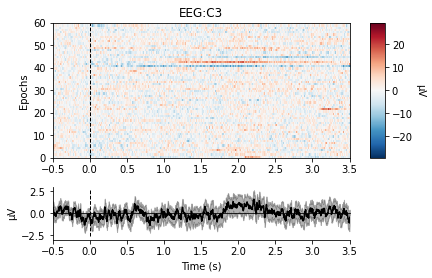

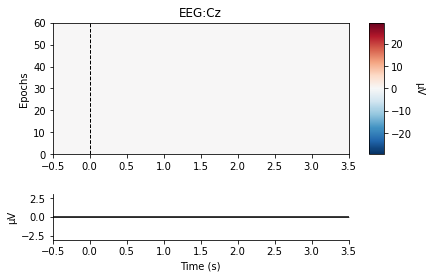

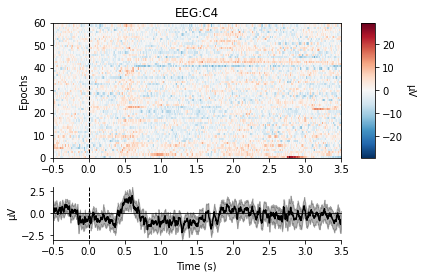

[<Figure size 432x288 with 3 Axes>,
 <Figure size 432x288 with 3 Axes>,
 <Figure size 432x288 with 3 Axes>]

In [129]:
right_epochs.plot_image(picks=my_raw.info['ch_names'])

No baseline correction applied


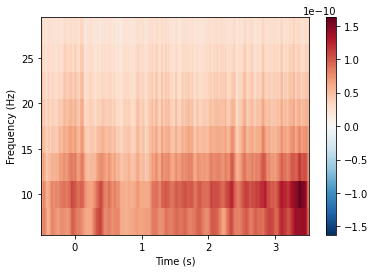

No baseline correction applied


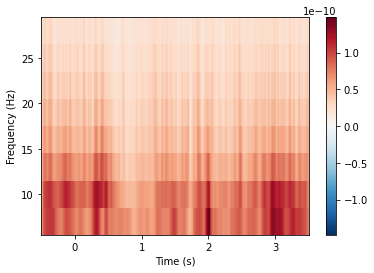

[<Figure size 432x288 with 2 Axes>]

In [130]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(left_epochs, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['EEG:C3'])
power.plot(['EEG:C4'])

No baseline correction applied


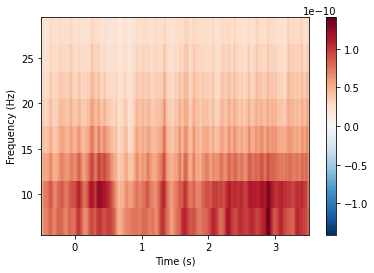

No baseline correction applied


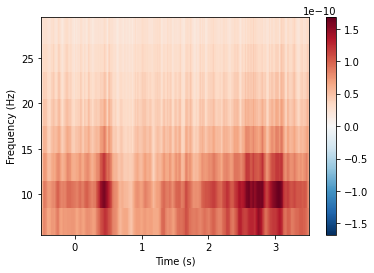

Figure(432x288)


In [132]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(right_epochs['770'], n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
a = power.plot(['EEG:C3'])
power.plot(['EEG:C4'])
print(a[0])
data = right_epochs['770'][0]

### ERD/ERS计算

In [133]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [134]:
## 2021年10月18日13:14:28 完成
def smooth2nd(x,M): ##x 为一维数组
    K = round(M/2-0.1) ##M应为奇数，如果是偶数，则取大1的奇数
    lenX = len(x)
    if lenX<2*K+1:
        print('数据长度小于平滑点数')
    else:
        y = np.zeros(lenX)
        for NN in range(0,lenX,1):
            startInd = max([0,NN-K])
            endInd = min(NN+K+1,lenX)
            y[NN] = np.mean(x[startInd:endInd])
##    y[0]=x[0]       #首部保持一致
##    y[-1]=x[-1]     #尾部也保持一致
    return(y)

In [136]:
def Get_Raw_Data(filename,tmin,tmax,show_info=False):
    raw = mne.io.read_raw_gdf(filename,preload=True)
    raw.filter(8, 12, fir_design='firwin', skip_by_annotation='edge')
    points_len = int((tmax-tmin)*250 )+ 1

    #打印数据信息
    if show_info:
        info = raw.info
        print(info)
        print('info 的关键字：',info.keys())
        print(info['ch_names'])
    
    #769 -- 佐    770 -- 右   771 -- 脚  772 -- 舌头
    custom_mapping = {'769':3,'770':4,'771':5,'772':6}
    (events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)

    #去除眼动EOG通道信号
    raw.drop_channels([ 'EOG-left', 'EOG-central', 'EOG-right'])

    epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=tmin,tmax=tmax)
    
    if show_info:
        print('------------------my print info----------------')
        info = raw.info
        print(info['ch_names'])
        evoked = epochs.average()
        evoked.plot(time_unit='s')
        print(epochs)
        plt.show()

    all_data = np.zeros((4,72,22,points_len),dtype=np.float32)

    for i in range(4):
        for d in enumerate(epochs[str(769+i)]):
            all_data[i,d[0],:,:] = d[1]

    print('all_data size : ',all_data.shape)
    return all_data

Extracting EDF parameters from e:\19_BCIexperiment\02_CodeTest\MNE_TEST\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


D:\ANACONDA\envs\ML_py38_CU\lib\site-packages\mne\io\edf\edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
D:\ANACONDA\envs\ML_py38_CU\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 413 samples (1.652 sec)

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 8.0 Hz
 lowpass: 12.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>
info 的关键字： dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_

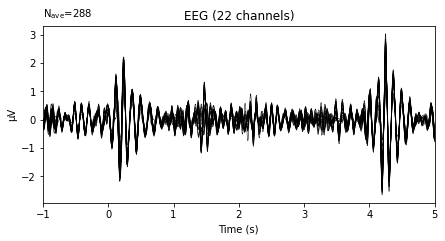

<Epochs |  288 events (all good), -1 - 5 sec, baseline -1 – 0 sec, ~72.6 MB, data loaded,
 '769': 72
 '770': 72
 '771': 72
 '772': 72>
all_data size :  (4, 72, 22, 1501)


In [137]:
all_data = Get_Raw_Data('A01T.gdf',-1,5,show_info=True)

data shape : (2, 72, 1501)
data_mean shape : (2, 1501)
C3 shape: (1501,)
(1501,)


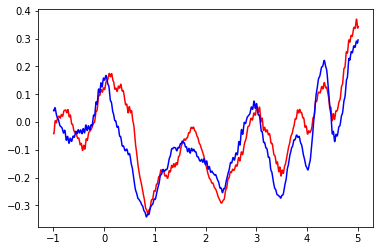

In [138]:
data = all_data[0,:,[7,11],:]
print('data shape :',data.shape)
R_start = 0
R_end = 1
sample_rate = 250

C3 = 0
C4 = 0
data_square = np.square(data)

data_mean = np.mean(data_square,axis=1)
print('data_mean shape :',data_mean.shape)

C3 = data_mean[0,:]
C4 = data_mean[1,:]

C3 = smooth2nd(C3,81)
C4 = smooth2nd(C4,81)
print('C3 shape:',C3.shape)

C3m = np.mean(C3[R_start*sample_rate:R_end*sample_rate])
C4m = np.mean(C4[R_start*sample_rate:R_end*sample_rate])
    
C3 = ((C3-C3m)/C3m)
C4 = ((C4-C4m)/C4m)

print(C3.shape)
x = np.linspace(1,1501,1501) / 250 -1
plt.plot(x,C3,'r')
plt.plot(x,C4,'b')
plt.show()



data shape : (2, 72, 1501)
data_mean shape : (2, 1501)
C3 shape: (1501,)
(1501,)


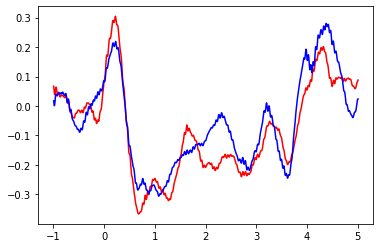

In [92]:
data = all_data[1,:,[7,11],:]
print('data shape :',data.shape)
R_start = 0
R_end = 1
sample_rate = 250

C3 = 0
C4 = 0
data_square = np.square(data)

data_mean = np.mean(data_square,axis=1)
print('data_mean shape :',data_mean.shape)

C3 = data_mean[0,:]
C4 = data_mean[1,:]

C3 = smooth2nd(C3,81)
C4 = smooth2nd(C4,81)
print('C3 shape:',C3.shape)

C3m = np.mean(C3[R_start*sample_rate:R_end*sample_rate])
C4m = np.mean(C4[R_start*sample_rate:R_end*sample_rate])
    
C3 = ((C3-C3m)/C3m)
C4 = ((C4-C4m)/C4m)

print(C3.shape)
x = np.linspace(1,1501,1501) / 250 -1
plt.plot(x,C3,'r')
plt.plot(x,C4,'b')
plt.show()

In [140]:
import os
import numpy as np
import matplotlib.pyplot as plt

# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne

Extracting EDF parameters from e:\19_BCIexperiment\02_CodeTest\MNE_TEST\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


D:\ANACONDA\envs\ML_py38_CU\lib\site-packages\mne\io\edf\edf.py:1131: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
D:\ANACONDA\envs\ML_py38_CU\lib\contextlib.py:120: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


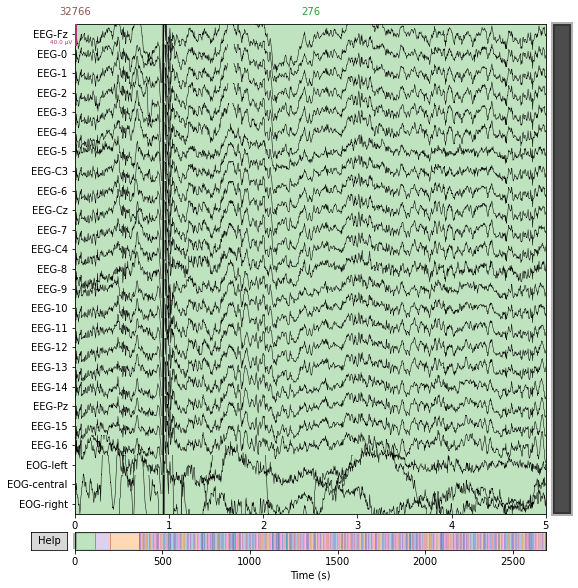

Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Used Annotations descriptions: ['769', '770', '771', '772']
Not setting metadata
Not setting metadata
288 matching events found
Setting baseline interval to [-0.5, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 1001 original time points ...
0 bad epochs dropped


['EEG-Fz',
 'EEG-0',
 'EEG-1',
 'EEG-2',
 'EEG-3',
 'EEG-4',
 'EEG-5',
 'EEG-C3',
 'EEG-6',
 'EEG-Cz',
 'EEG-7',
 'EEG-C4',
 'EEG-8',
 'EEG-9',
 'EEG-10',
 'EEG-11',
 'EEG-12',
 'EEG-13',
 'EEG-14',
 'EEG-Pz',
 'EEG-15',
 'EEG-16']

In [142]:
my_raw = mne.io.read_raw_gdf('A01T.gdf')
my_raw.plot(duration=5, n_channels=30)
my_raw.load_data()


tmin = -0.5
tmax = 3.5

#769 -- 佐    770 -- 右   771 -- 脚  772 -- 舌头
custom_mapping = {'769':3,'770':4,'771':5,'772':6}
(events_from_annot,event_dict) = mne.events_from_annotations(my_raw, event_id=custom_mapping)

#去除眼动EOG通道信号
my_raw.drop_channels([ 'EOG-left', 'EOG-central', 'EOG-right'])

epochs = mne.Epochs(my_raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=tmin,tmax=tmax)

my_raw.info['ch_names']

In [143]:
montage_dir = os.path.join(os.path.dirname(mne.__file__),
                           'channels', 'data', 'montages')
print('\nBUILT-IN MONTAGE FILES')
print('======================')
print(sorted(os.listdir(montage_dir)))


BUILT-IN MONTAGE FILES
['EGI_256.csd', 'GSN-HydroCel-128.sfp', 'GSN-HydroCel-129.sfp', 'GSN-HydroCel-256.sfp', 'GSN-HydroCel-257.sfp', 'GSN-HydroCel-32.sfp', 'GSN-HydroCel-64_1.0.sfp', 'GSN-HydroCel-65_1.0.sfp', 'artinis-brite23.elc', 'artinis-octamon.elc', 'biosemi128.txt', 'biosemi16.txt', 'biosemi160.txt', 'biosemi256.txt', 'biosemi32.txt', 'biosemi64.txt', 'easycap-M1.txt', 'easycap-M10.txt', 'mgh60.elc', 'mgh70.elc', 'standard_1005.elc', 'standard_1020.elc', 'standard_alphabetic.elc', 'standard_postfixed.elc', 'standard_prefixed.elc', 'standard_primed.elc']


In [144]:
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
print(ten_twenty_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


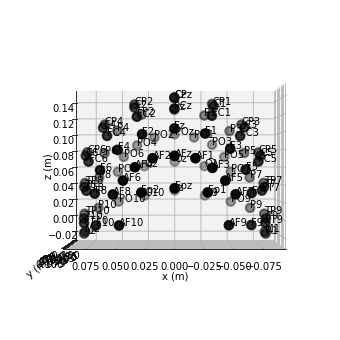

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


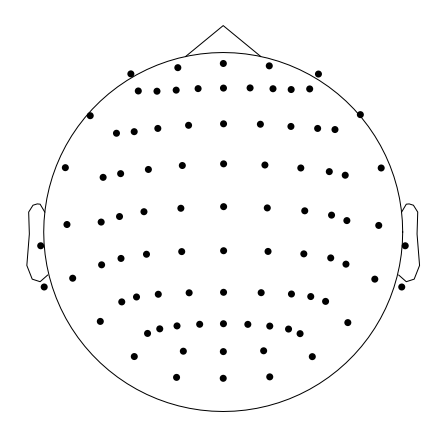

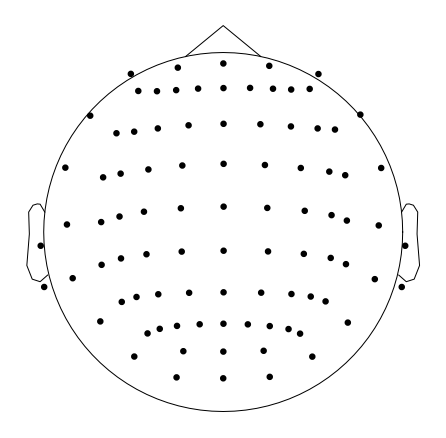

In [145]:
fig = ten_twenty_montage.plot(kind='3d')
fig.gca().view_init(azim=70, elev=15)  # set view angle
ten_twenty_montage.plot(kind='topomap', show_names=False)